In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fide-chess-rankings-updated/Chess FIDE Rankings.csv


# The importation and Analysis of the Dataset


In [81]:
DataFrame = pd.read_csv('../input/fide-chess-rankings-updated/Chess FIDE Rankings.csv')

In [82]:
DataFrame.head()

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982


In [83]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         200 non-null    int64 
 1   name         200 non-null    object
 2   ELO          200 non-null    int64 
 3   title        200 non-null    object
 4   federation   200 non-null    object
 5   games        200 non-null    int64 
 6   birth_year   200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


# Data Cleaning
Now, we need to clean the data to make it easier to work with, and for this, we need to delete all the spaces.


In [84]:
DataFrame.columns = DataFrame.columns.str.strip()


# Number of GM

We need to know how many GM there are in the Dataset.

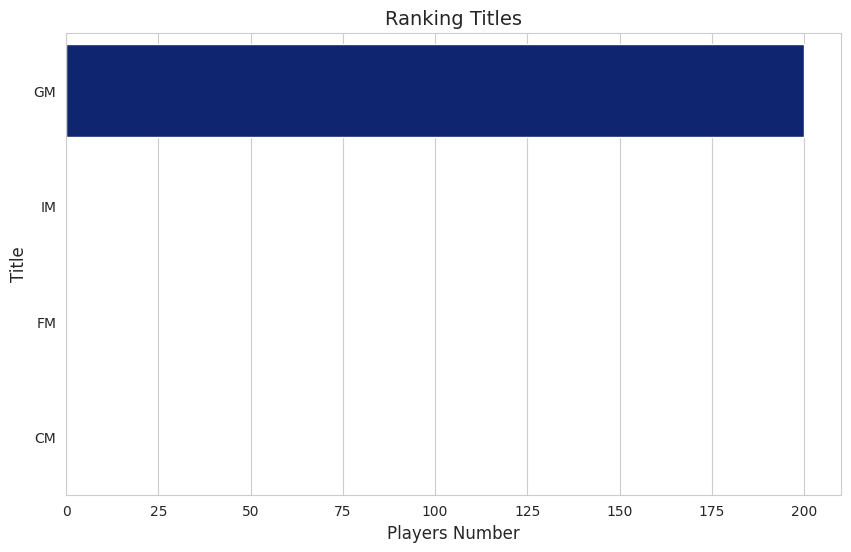

In [85]:
title_counts = DataFrame['title'].value_counts()

title_order = ['GM', 'IM', 'FM', 'CM']

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  
sns.countplot(data=DataFrame, y='title', order=title_order, palette='dark')  
plt.xlabel('Players Number', fontsize=12)  
plt.ylabel('Title', fontsize=12)  
plt.title('Ranking Titles', fontsize=14)  
plt.show()

# Players by Federation
Now, we need to know the number of players by Federation.

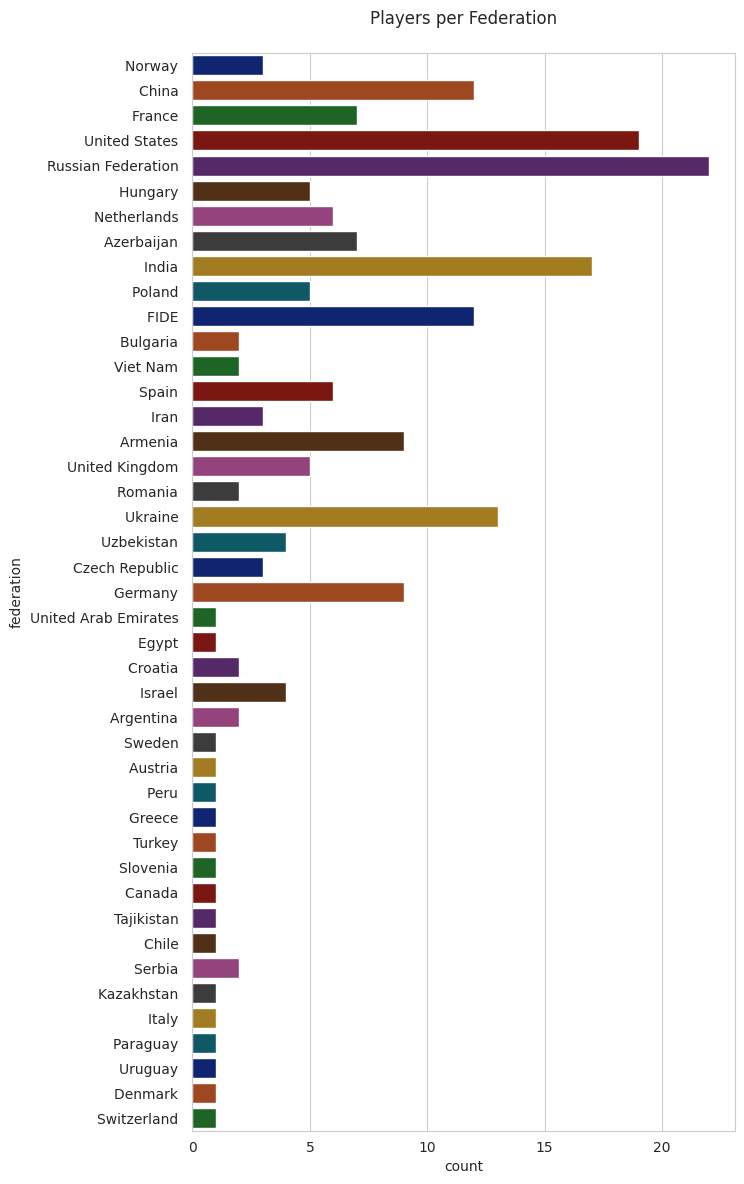

In [86]:
plt.figure(figsize=(7,14))
sns.countplot(data=DataFrame, y='federation',palette='dark')
plt.title('Players per Federation\n')
plt.show()

# Mean ELO by Federation
This is to find out the highest ELO mean by country

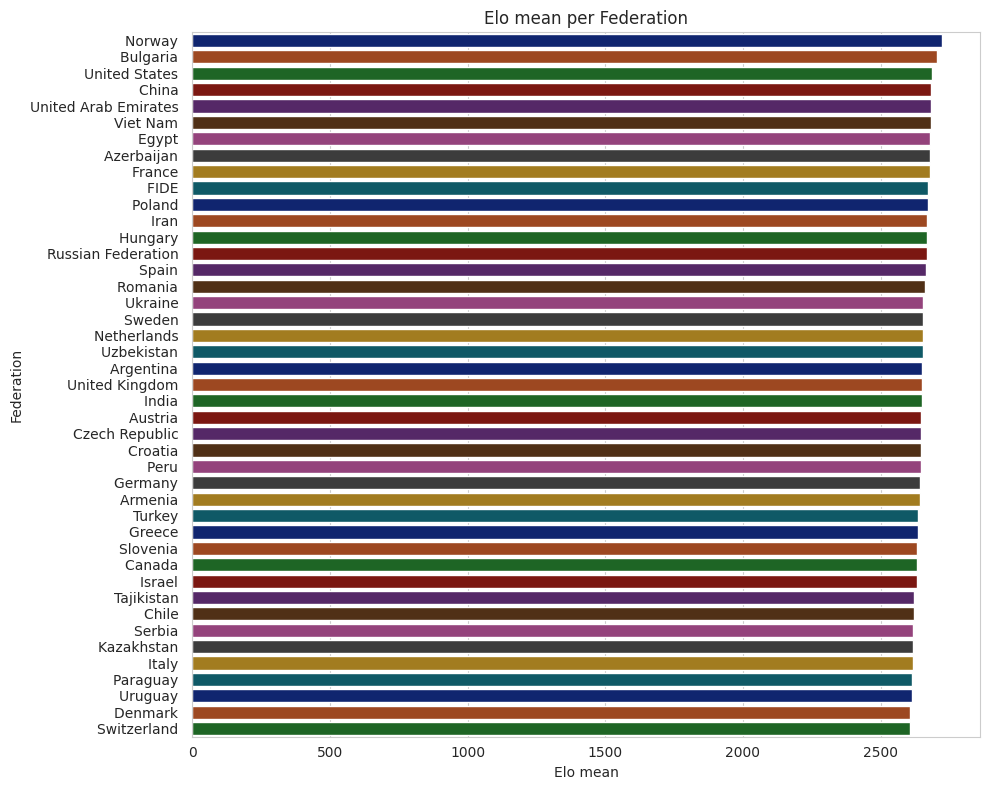

In [87]:
elo_por_federacion = DataFrame.groupby('federation')['ELO'].mean().reset_index()

elo_por_federacion = elo_por_federacion.sort_values(by='ELO', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=elo_por_federacion, x='ELO', y='federation', palette='dark')
plt.xlabel('Elo mean')
plt.ylabel('Federation')
plt.title('Elo mean per Federation')
plt.tight_layout()  
plt.show()

In [88]:
elo_por_federacion = DataFrame.groupby('federation')['ELO'].mean().reset_index()
elo_por_federacion.rename(columns={'federation':'Federation','ELO': 'ELO Mean'}, inplace=True)
print(elo_por_federacion)

               Federation     ELO Mean
0              Argentina   2652.000000
1                Armenia   2641.444444
2                Austria   2647.000000
3             Azerbaijan   2679.428571
4               Bulgaria   2706.500000
5                 Canada   2631.000000
6                  Chile   2620.000000
7                  China   2684.333333
8                Croatia   2645.500000
9         Czech Republic   2645.666667
10               Denmark   2608.000000
11                 Egypt   2680.000000
12                  FIDE   2672.833333
13                France   2678.857143
14               Germany   2643.888889
15                Greece   2634.000000
16               Hungary   2667.600000
17                 India   2651.235294
18                  Iran   2668.666667
19                Israel   2630.500000
20                 Italy   2616.000000
21            Kazakhstan   2617.000000
22           Netherlands   2653.666667
23                Norway   2724.666667
24              Paraguay 

# The mean Birth Year and Title

In [89]:
mean_age = DataFrame.groupby('title')['birth_year'].mean().reset_index()
print(mean_age)

  title  birth_year
0    GM    1989.395


# Is there relationship between the ELO and the Number of Games?

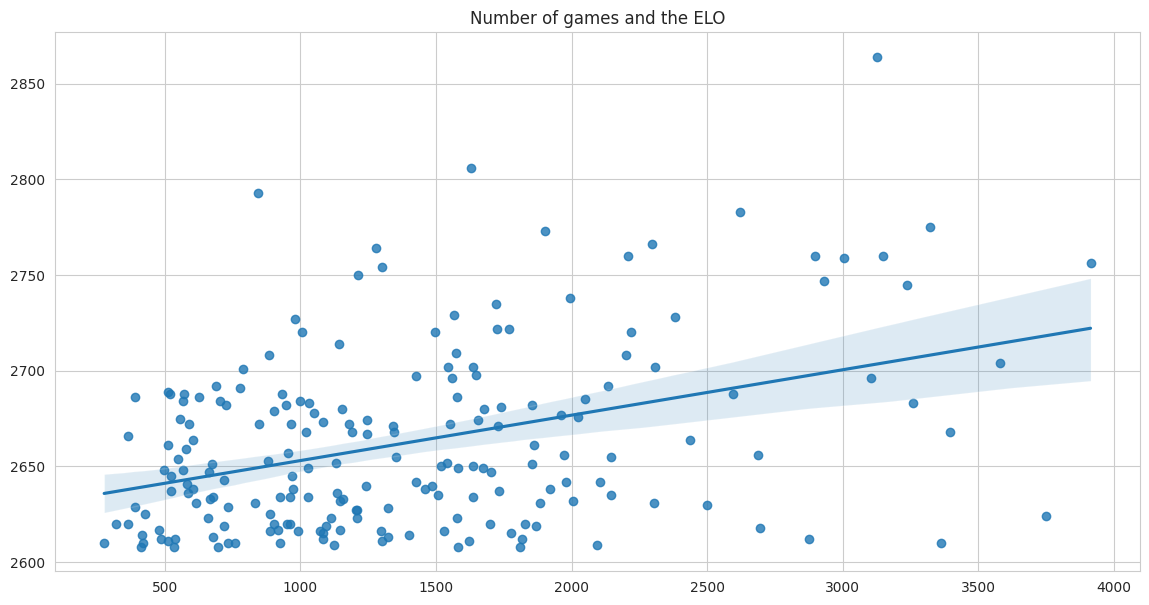

In [90]:
plt.figure(figsize=(14,7))
sns.regplot(data=DataFrame, x='games', y='ELO')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of games and the ELO')
plt.show()

# Is there a relationship between the birthyear and the ELO?

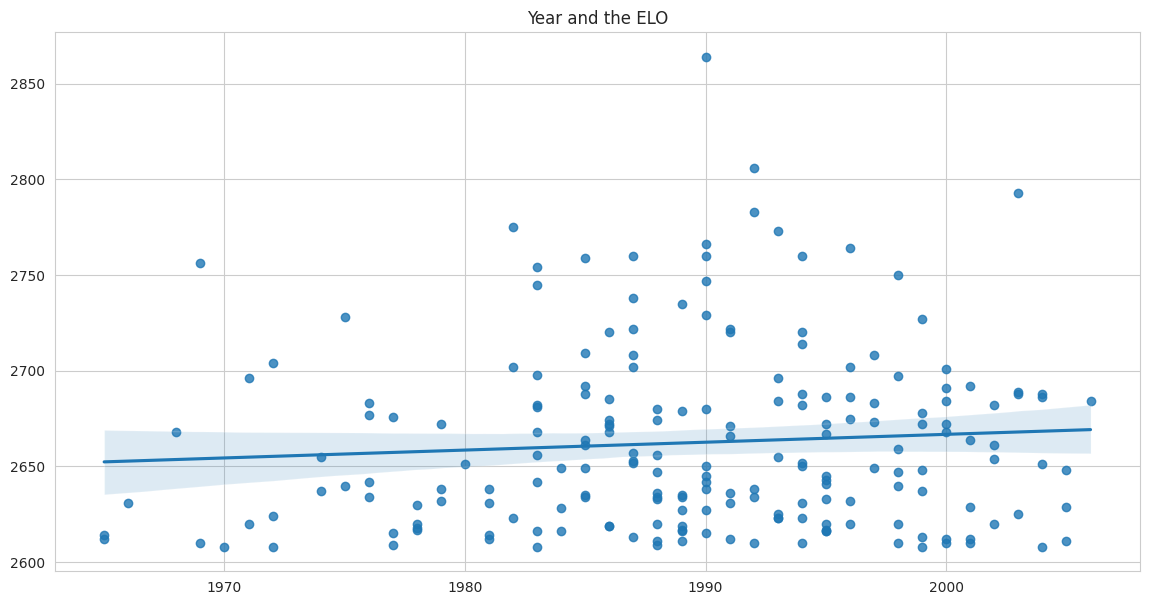

In [91]:
plt.figure(figsize=(14,7))
sns.regplot(data=DataFrame, x='birth_year',y='ELO')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Year and the ELO')
plt.show()

It seems that there is not much correlation between age and ELO.

# The best player by country

In [92]:
players_with_max_elo = DataFrame.groupby('federation').apply(lambda x: x.loc[x['ELO'].idxmax()])

fig = px.scatter(players_with_max_elo, x='ELO', y='federation', color='title', hover_data=['name'])

fig.update_layout(
    title='Prominent Players by Country (Highest ELO)',
    xaxis_title='The highest ELO',
    yaxis_title='Country'
)

fig.show()


You can see who is the player with more ELO by country 

**Thanks for reading my first work. All the feedback is welcome and apperciated.**

**This project was inspired by Pecar, R. [FIDE Chess Rankings - EDA]. Retrieved from [ https://www.kaggle.com/code/russellpecar/fide-chess-rankings-eda ]